In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import jetsimpy as grb
from astropy.cosmology import Planck15 as cosmo

def lc_plot(
        jetType, loge0, logepsb, logepse, logn0, thc, thv, p, z,
        observed_data, observed_data_fit):
    # Jet Parameters
    dl = cosmo.luminosity_distance(z).to("Mpc").value  # Luminosity distance in Mpc
    print(f"Luminosity distance: {dl} Mpc")
    Z = {'theta_v':    thv,   # Viewing angle in radians
        'Eiso':        10**loge0, # Isotropic-equivalent energy in erg
        'theta_c':     thc,    # Half-opening angle in radians
        'n0':          10**logn0,    # circumburst density in cm^{-3}
        'p':           p,    # electron energy distribution index
        'eps_e':       10**logepse,    # epsilon_e
        'eps_b':       10**logepsb,   # epsilon_B
        'd':           dl, # Luminosity distance in cm
        'z':           z,   # redshift
        'A':           0,
        'lf':          1e+100,
        's':           6,
    }

    # Time and Frequencies
    ta = 1.0e-2 * 86400
    tb = 1.0e2 * 86400
    t = np.geomspace(ta, tb, num=100)

    df_allobs = pd.read_csv(observed_data)
    df_fit = pd.read_csv(observed_data_fit)

    frequencies = df_allobs[['Filt','Freqs']].drop_duplicates().sort_values(by='Freqs').to_numpy()

    fig, ax = plt.subplots(1, 1)
    cmap = get_cmap('rainbow')  # or 'plasma', 'cividis', 'magma'
    colors = cmap(np.linspace(0, 1, len(frequencies)))

    for i, (band,nu) in enumerate(frequencies):
        print(f"Calculating for frequency: {nu}")
        Fnu_model = []

        if jetType == 'powerlaw':
            Fnu_model = grb.FluxDensity_powerlaw(t, nu, Z)
        elif jetType == 'gaussian':
            Fnu_model = grb.FluxDensity_gaussian(t, nu, Z)
        elif jetType == 'tophat':
            Fnu_model = grb.FluxDensity_tophat(t, nu, Z)
        else:
            raise ValueError(f"Invalid jet type: {jetType}")

        Fnu_model = np.array(Fnu_model)

        Fnu_allobs = df_allobs[df_allobs['Filt']==band][['Times','Fluxes']].sort_values(by='Times').to_numpy()
        Fnu_fit = df_fit[df_fit['Filt']==band][['Times','Fluxes']].sort_values(by='Times').to_numpy()


        ax.plot(t, Fnu_model,  linestyle='dashed', linewidth=1.0, label=f'{band}', color=colors[i])

        ax.plot(Fnu_allobs[:,0], Fnu_allobs[:,1], marker='x', linestyle='solid', linewidth=0.5, color=colors[i])
    
        ax.scatter(Fnu_fit[:,0], Fnu_fit[:,1], marker='*', s=100, color=colors[i])

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'$t$ (s)')
    ax.set_ylabel(r'$F_\nu$ (mJy)')

    # Create text content with all Z dictionary values
    z_text = "Parameters:"
    for key, value in Z.items():
        if key in ['jetType', 'specType', 'z', 'E0']:
            continue
            # Skip function objects, just show the key
            #z_text += f"{key}: {type(value).__name__}\n"
        else:
            z_text += '\n'
            # Format numerical values
            if isinstance(value, (int, float)):
                if abs(value) >= 1e6 or (abs(value) < 1e-3 and value != 0):
                    z_text += f"{key}: {value:.2e}"
                else:
                    z_text += f"{key}: {value:.4f}"
            else:
                z_text += f"{key}: {value}"
    
    # Add textbox with all Z dictionary values
    ax.text(0.98, 0.02, z_text, transform=ax.transAxes,
            bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.5, edgecolor='none'),
            verticalalignment='bottom', horizontalalignment='right', fontsize=10, fontfamily='monospace')
    
    #marker_text = "*  Observations used for fitting\nx  All observations\nDashed lines show the best fit"
    #ax.text(0.2, 0.02, marker_text, transform=ax.transAxes, 
    #        bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.9, edgecolor="black"),
    #        verticalalignment='bottom', fontsize=10, fontfamily='monospace')
    
    ax.legend(edgecolor='none')
    fig.tight_layout()

    print("Saving plots/lc_afterflow_obs_matching.pdf")
    fig.savefig("plots/lc_afterflow_obs_matching.pdf", format='pdf', bbox_inches='tight')
    plt.show()
    plt.close(fig)

# Fitting without radio 

In [170]:


lc_plot(

E0=52.3926,
epsilon_b=-1.5939,
epsilon_e=-0.1301,
n0=-2.1258,
thetaCore=0.0512,
thetaObs= 0.1156,
p=2.3420,
z=0.661,
 observed_data='data/EP250704a_trunc.csv',
 observed_data_fit='data/EP250704a_trunc.csv')#final_extinct_corr.csv')


TypeError: lc_plot() got an unexpected keyword argument 'E0'

# Fitting with radio data

Luminosity distance: 4087.994991508973 Mpc
Calc Radio
Calc Optical
Calc X-ray
Optical Obs data sample: [[1.22400000e+03 2.37698395e-02]
 [5.68080000e+04 4.44658142e-02]
 [7.20000000e+04 3.63100000e-02]]
Observed Data loaded successfully!
Optical observations (i-band): 3 data points
Radio observations: 3 data points
X-ray observations (Swift): 3 data points
Plot
Saving plots/lc_afterflow_obs_matching.pdf


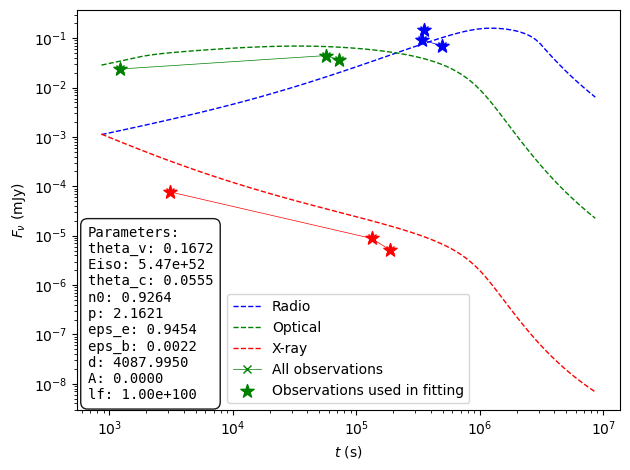

In [ ]:



lc_plot(

E0=52.7377,
epsilon_b=-2.6592,
epsilon_e=-0.0244,
n0=-0.0332,
thetaCore=0.0555,
thetaObs= 0.1672,
p=2.1621,
z=0.661,
 observed_data='data/EP250704a_trunc.csv',
 observed_data_fit='data/EP250704a_trunc.csv')#final_extinct_corr.csv')


# Fitting with radio 3 points

Luminosity distance: 4087.994991508973 Mpc
Calc Radio
Calc Optical
Calc X-ray
Optical Obs data sample: [[1.22400000e+03 2.92702377e-02]
 [2.20529000e+04 3.71900060e-02]
 [3.70040000e+04 4.90259761e-02]
 [4.96480000e+04 5.32630766e-02]
 [5.68080000e+04 5.47553109e-02]]
Observed Data loaded successfully!
Optical observations (i-band): 8 data points
Radio observations: 3 data points
X-ray observations (Swift): 16 data points
Plot
Saving plots/lc_afterflow_obs_matching.pdf


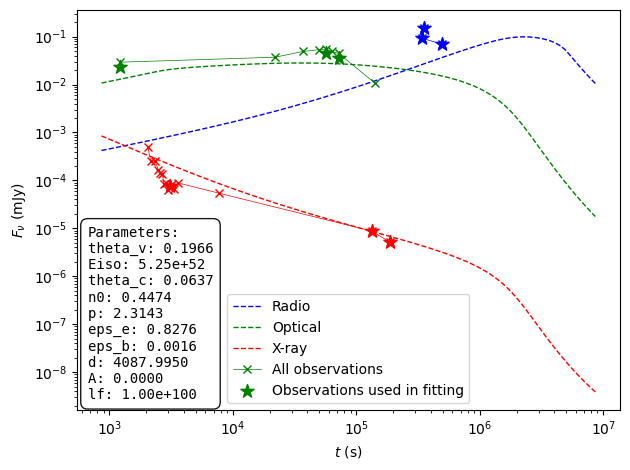

In [ ]:
lc_plot(
E0=52.7202,
epsilon_b=-2.7996,
epsilon_e=-0.0822,
n0=-0.3493,
thetaCore=0.0637,
thetaObs= 0.1966,
p=2.3143,
z=0.661,
 observed_data='data/EP250704a_final_extinct_corr.csv',
 observed_data_fit='data/EP250704a_trunc.csv',)#final_extinct_corr.csv')


# Gaussian Jet. epsilon_e fixed

Luminosity distance: 4087.994991508973 Mpc
Calculating for frequency: 1300000000.0
Calculating for frequency: 6000000000.0
Calculating for frequency: 10000000000.0


/var/folders/wz/tf9bd1d17kxcg2r9f2875tv00000gn/T/ipykernel_14699/514118935.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('rainbow')  # or 'plasma', 'cividis', 'magma'


Calculating for frequency: 240000000000000.0
Calculating for frequency: 328215960148894.2
Calculating for frequency: 381000000000000.0
Calculating for frequency: 393170436721311.5
Calculating for frequency: 468671768303359.2
Calculating for frequency: 481130569731985.2
Calculating for frequency: 605000000000000.0
Calculating for frequency: 628495719077568.1
Calculating for frequency: 2.42e+18
Saving plots/lc_afterflow_obs_matching.pdf


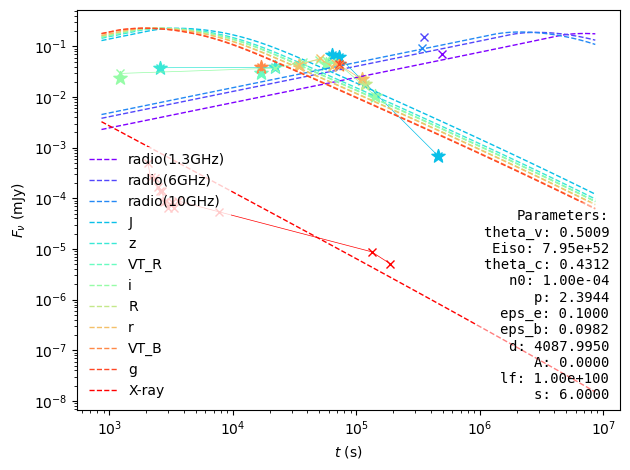

In [183]:

lc_plot(jetType='gaussian',
loge0=52.90053075, logepsb=-1.00795570, logepse=-0.99998104, logn0=-3.99997147, thc=0.43116680, thv=0.50089356, p=2.39438172,
z=0.661,
 observed_data='data/EP250704a_final_extinct_corr.csv',
 observed_data_fit='data/EP250704a_trunc.csv',)#final_extinct_corr.csv')


# Tophat jet

Luminosity distance: 4087.994991508973 Mpc
Calculating for frequency: 1300000000.0


/var/folders/wz/tf9bd1d17kxcg2r9f2875tv00000gn/T/ipykernel_14699/514118935.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('rainbow')  # or 'plasma', 'cividis', 'magma'


Calculating for frequency: 6000000000.0
Calculating for frequency: 10000000000.0
Calculating for frequency: 240000000000000.0
Calculating for frequency: 328215960148894.2
Calculating for frequency: 381000000000000.0
Calculating for frequency: 393170436721311.5
Calculating for frequency: 468671768303359.2
Calculating for frequency: 481130569731985.2
Calculating for frequency: 605000000000000.0
Calculating for frequency: 628495719077568.1
Calculating for frequency: 2.42e+18
Calculating for frequency: nan
Saving plots/lc_afterflow_obs_matching.pdf


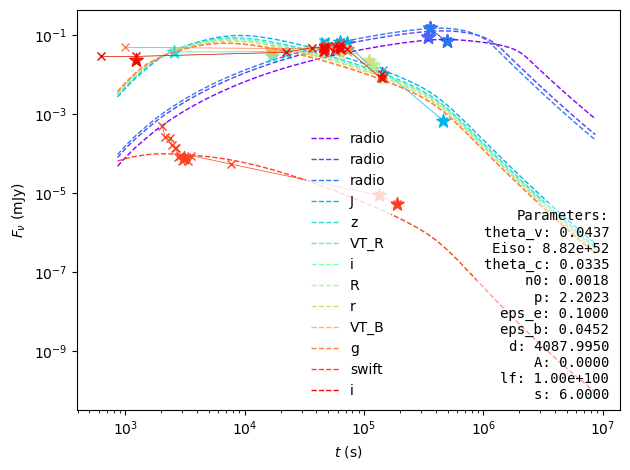

In [186]:
lc_plot(jetType='tophat',
    loge0=52.94548175, logepsb=-1.34480050, logepse=-0.99998716, logn0=-2.74998435, thc=0.03354939, thv=0.04374608, p=2.20225807,
    z=0.661,
    observed_data='data/mcmc_df.csv',
    observed_data_fit='data/EP250704a_trunc.csv',) 


# powerlaw jet

Luminosity distance: 4087.994991508973 Mpc
Calculating for frequency: 1300000000.0
Calculating for frequency: 6000000000.0
Calculating for frequency: 10000000000.0


/var/folders/wz/tf9bd1d17kxcg2r9f2875tv00000gn/T/ipykernel_14699/353512632.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('rainbow')  # or 'plasma', 'cividis', 'magma'


Calculating for frequency: 240000000000000.0
Calculating for frequency: 328215960148894.2
Calculating for frequency: 381000000000000.0
Calculating for frequency: 393170436721311.5
Calculating for frequency: 468671768303359.2
Calculating for frequency: 481130569731985.2
Calculating for frequency: 605000000000000.0
Calculating for frequency: 628495719077568.1
Calculating for frequency: 2.42e+18
Saving plots/lc_afterflow_obs_matching.pdf


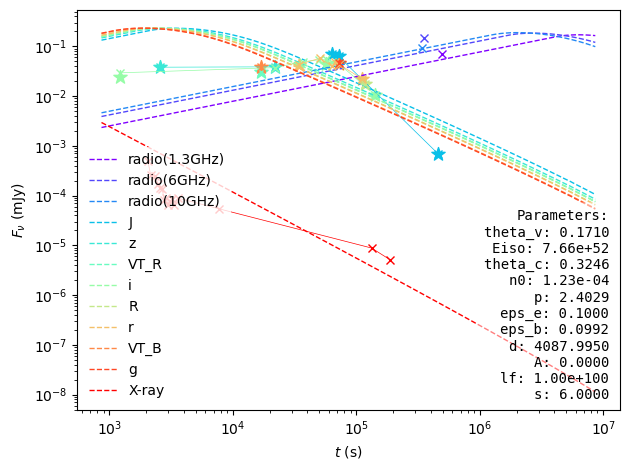

In [181]:
lc_plot(jetType='powerlaw',
   loge0=52.88432256, logepsb=-1.00328446, logepse=-0.99992302, logn0=-3.90943373, thc=0.32462363, thv=0.17098942, p=2.40285471,
 z=0.661,
    observed_data='data/EP250704a_final_extinct_corr.csv',
    observed_data_fit='data/EP250704a_trunc.csv',)